# Punjab Hospitals Bed status Pakistan

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
path=r"C:\Users\AIMAN\Desktop\dataset\Punjab_Hospital_Bed_Statistics.csv"
df=pd.read_csv(path)

In [72]:
df.head()

,_id,Name of Hospital,Category,Hospital Type,City/ Tehsil,No. of beds in:,Allocated,Filled,Vacant
0,1,"Mayo Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,92,12,80
1,2,"Jinnah Hospital, Lahore.",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,0,0,0
2,3,"Sir Ganga Ram Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,22,2,20
3,4,"Lahore General Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,10,10,0
4,5,"Services Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,82,65,17


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               929 non-null    int64 
 1   Name of Hospital  929 non-null    object
 2   Category          926 non-null    object
 3   Hospital Type     929 non-null    object
 4   City/ Tehsil      929 non-null    object
 5   No. of beds in:   929 non-null    object
 6   Allocated         929 non-null    int64 
 7   Filled            929 non-null    int64 
 8   Vacant            929 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 65.4+ KB


In [74]:
df.columns

Index(['_id', 'Name of Hospital', 'Category', 'Hospital Type', 'City/ Tehsil',
       'No. of beds in:', 'Allocated', 'Filled', 'Vacant'],
      dtype='object')

In [75]:
df.rename(columns={
    df.columns[0]:'id',
    df.columns[1]:'hospital',
    df.columns[2]:'category',
    df.columns[3]:'hospital_type',
    df.columns[4]:'city',
    df.columns[5]:'total_beds',
    df.columns[6]:'allocated',
    df.columns[7]:'filled',
    df.columns[8]:'vacant'

    },inplace=True)

In [76]:
df.columns=df.columns.str.lower()

In [77]:
df.head(5)

,id,hospital,category,hospital_type,city,total_beds,allocated,filled,vacant
0,1,"Mayo Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,92,12,80
1,2,"Jinnah Hospital, Lahore.",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,0,0,0
2,3,"Sir Ganga Ram Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,22,2,20
3,4,"Lahore General Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,10,10,0
4,5,"Services Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,82,65,17


<Axes: xlabel='city', ylabel='count'>

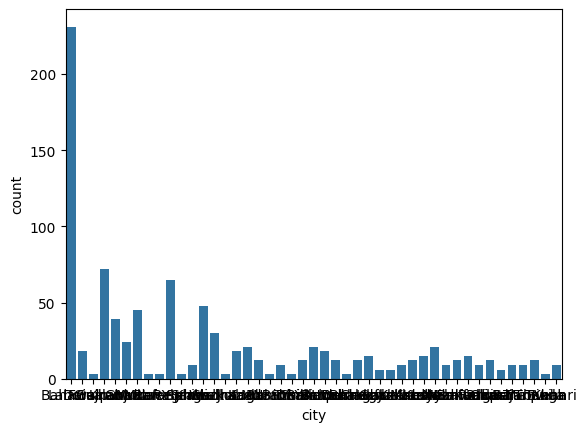

In [78]:
sns.countplot(x='city',data=df)

In [79]:
filtered_hospitals = df[df['allocated'] > 50]

In [80]:
grouped = df.groupby('hospital_type')['allocated'].sum()


In [81]:
sorted_df = df.sort_values(by='allocated', ascending=False)

In [82]:
df['filled_percentage'] = (df['filled'] / len(df)) * 100

In [83]:
df.head()

,id,hospital,category,hospital_type,city,total_beds,allocated,filled,vacant,filled_percentage
0,1,"Mayo Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,92,12,80,1.291712
1,2,"Jinnah Hospital, Lahore.",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,0,0,0,0.000000
2,3,"Sir Ganga Ram Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,22,2,20,0.215285
3,4,"Lahore General Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,10,10,0,1.076426
4,5,"Services Hospital, Lahore",Genral/Covid,SHC&MED Hospitals,Lahore,Isolation wards / Rooms,82,65,17,6.996771


In [84]:
df.category.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 929 non-null    int64  
 1   hospital           929 non-null    object 
 2   category           929 non-null    object 
 3   hospital_type      929 non-null    object 
 4   city               929 non-null    object 
 5   total_beds         929 non-null    object 
 6   allocated          929 non-null    int64  
 7   filled             929 non-null    int64  
 8   vacant             929 non-null    int64  
 9   filled_percentage  929 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 72.7+ KB


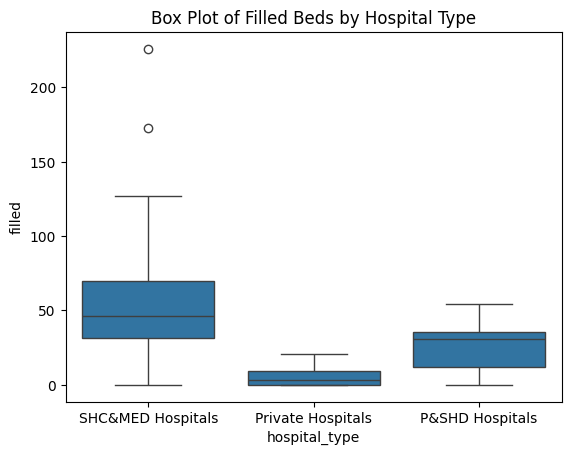

In [89]:
import seaborn as sns
sns.boxplot(x='hospital_type', y='filled', data=filtered_hospitals)
plt.title('Box Plot of Filled Beds by Hospital Type')
plt.show()

In [99]:
file_name='filtered_hospital.csv'
filtered_hospitals.to_csv(file_name,index=False)


In [101]:
filtered_hospitals.describe()

,id,allocated,filled,vacant
count,47.000000,47.000000,47.000000,47.000000
mean,265.085106,105.255319,41.127660,64.127660
std,246.575487,57.752646,43.298568,42.000837
min,1.000000,51.000000,0.000000,0.000000
25%,70.500000,69.000000,12.000000,33.000000
50%,118.000000,82.000000,35.000000,64.000000
75%,533.000000,120.000000,49.500000,80.000000
max,742.000000,294.000000,226.000000,240.000000


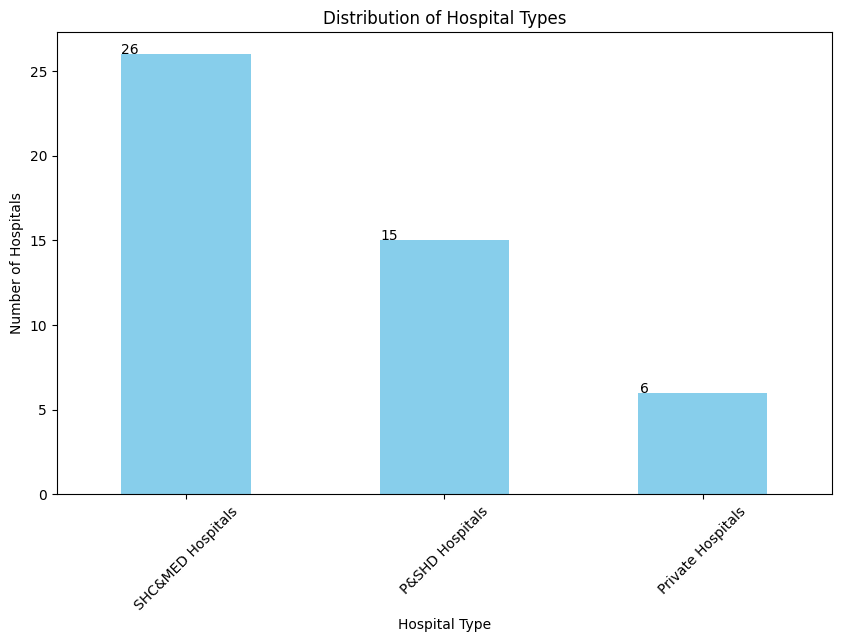

In [111]:
# Count hospitals by type
hospital_type_counts = filtered_hospitals['hospital_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
ax=hospital_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Hospital Types')
plt.xlabel('Hospital Type')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=45)
# Add count labels on bars 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()))
plt.show()

C:\Users\AIMAN\AppData\Local\Temp\ipykernel_17416\2761136361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hospitals['occupancy_rate'] = (filtered_hospitals['filled'] / filtered_hospitals['allocated']) * 100


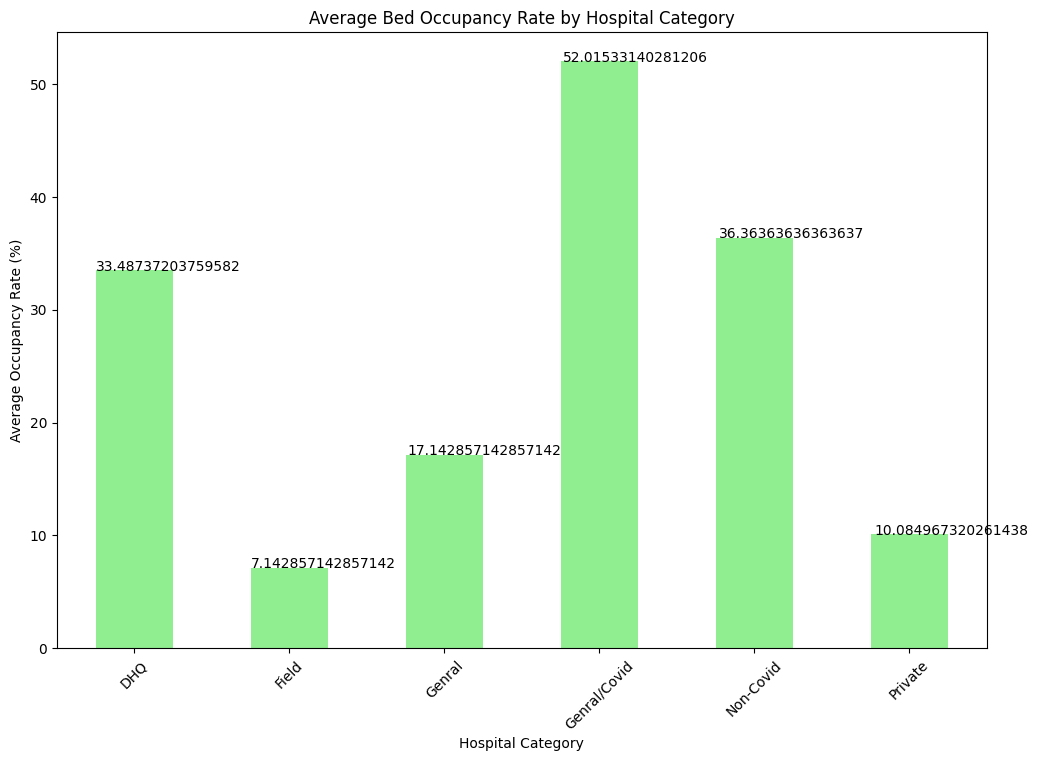

In [121]:
# Calculate occupancy rate
filtered_hospitals['occupancy_rate'] = (filtered_hospitals['filled'] / filtered_hospitals['allocated']) * 100

# Plotting occupancy rates by hospital category
plt.figure(figsize=(12, 8))
ay=filtered_hospitals.groupby('category')['occupancy_rate'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Bed Occupancy Rate by Hospital Category')
plt.xlabel('Hospital Category')
plt.ylabel('Average Occupancy Rate (%)')
plt.xticks(rotation=45)

for p in ay.patches:

    ay.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()))

plt.show()